In [27]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from matplotlib.ticker import FuncFormatter 
import numpy as np

In [28]:
World_data=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\world_data.csv')
country_data=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\countries_data.csv')
vietnam_data=country_data[country_data['location']=='Vietnam']
df_territory = pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\country-codes.csv')
continent_data=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\continents_data.csv')

## Tổng quan về tình hình dịch covid 19

### Biều đồ số ca nhiễm mới và tử vong mới theo thời gian

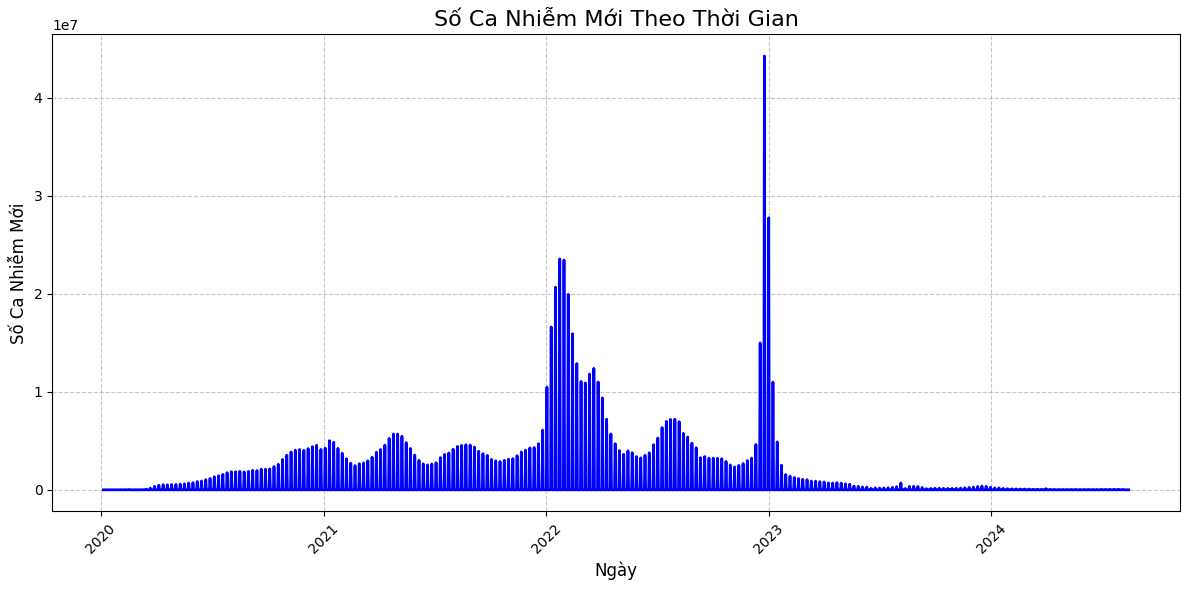

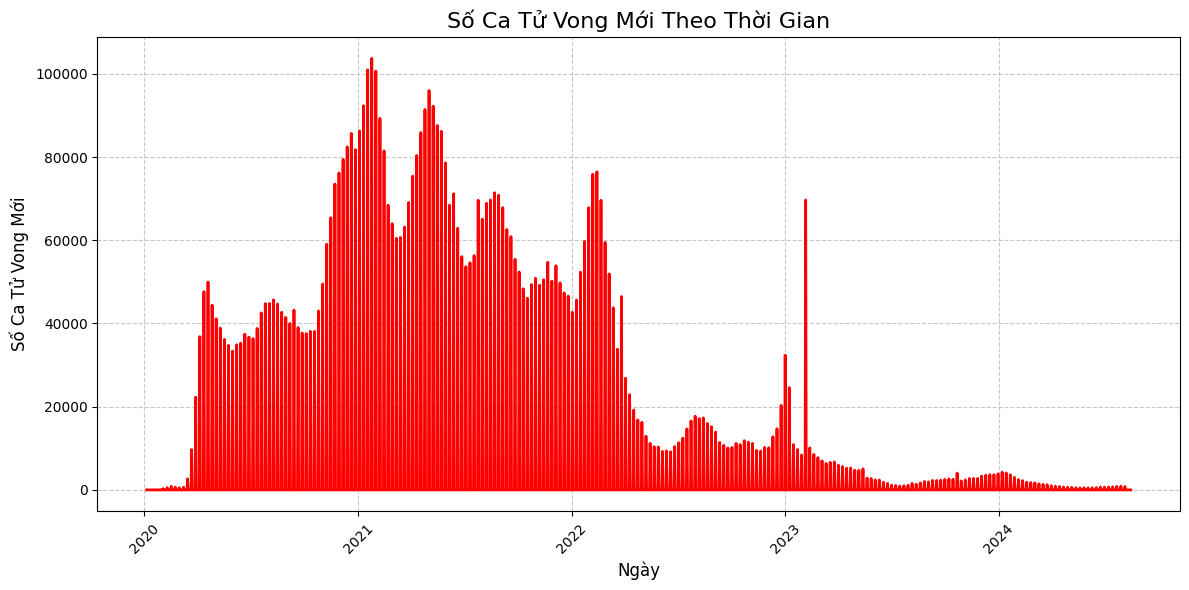

In [29]:
# lọc dữ liệu
World_data['date'] = pd.to_datetime(World_data['date'])
cases_over_time = World_data.groupby('date')['new_cases'].sum().reset_index() 
deaths_over_time = World_data.groupby('date')['new_deaths'].sum().reset_index()  
cases_over_time['CumulativeCases'] = cases_over_time['new_cases'].cumsum()
deaths_over_time['CumulativeDeaths'] = deaths_over_time['new_deaths'].cumsum()

# Số ca nhiễm mới theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=cases_over_time, color='blue', linewidth=2)  
plt.title('Số Ca Nhiễm Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Nhiễm Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

# Số ca tử vong mới theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=deaths_over_time, color='red', linewidth=2)  
plt.title('Số Ca Tử Vong Mới Theo Thời Gian', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Tử Vong Mới', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()



### tích lũy số ca nhễm và tử vong

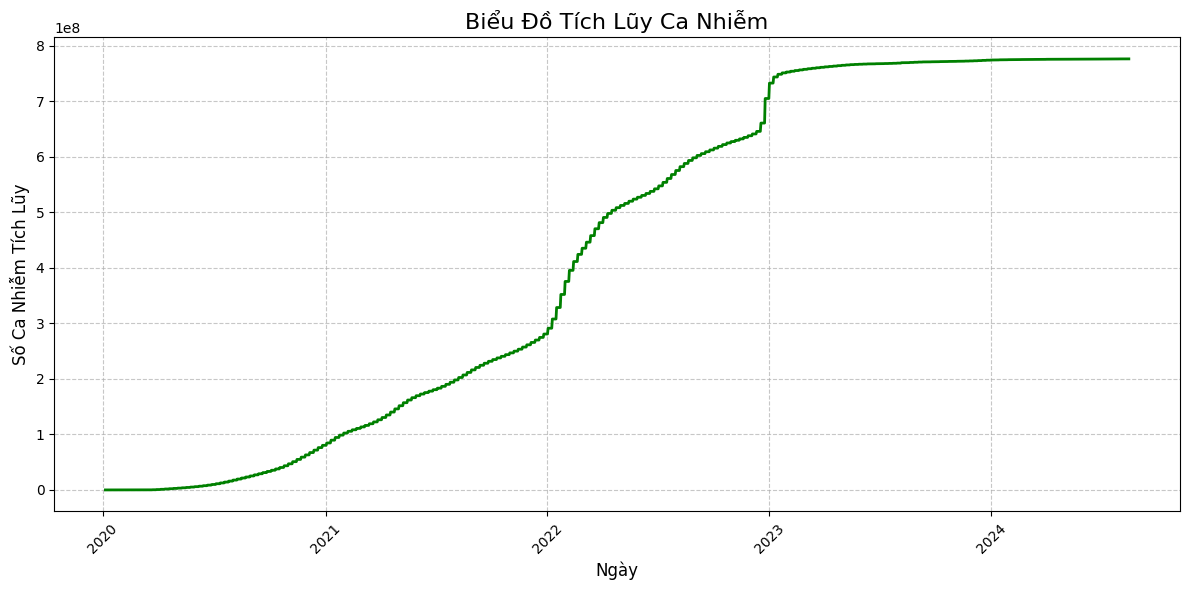

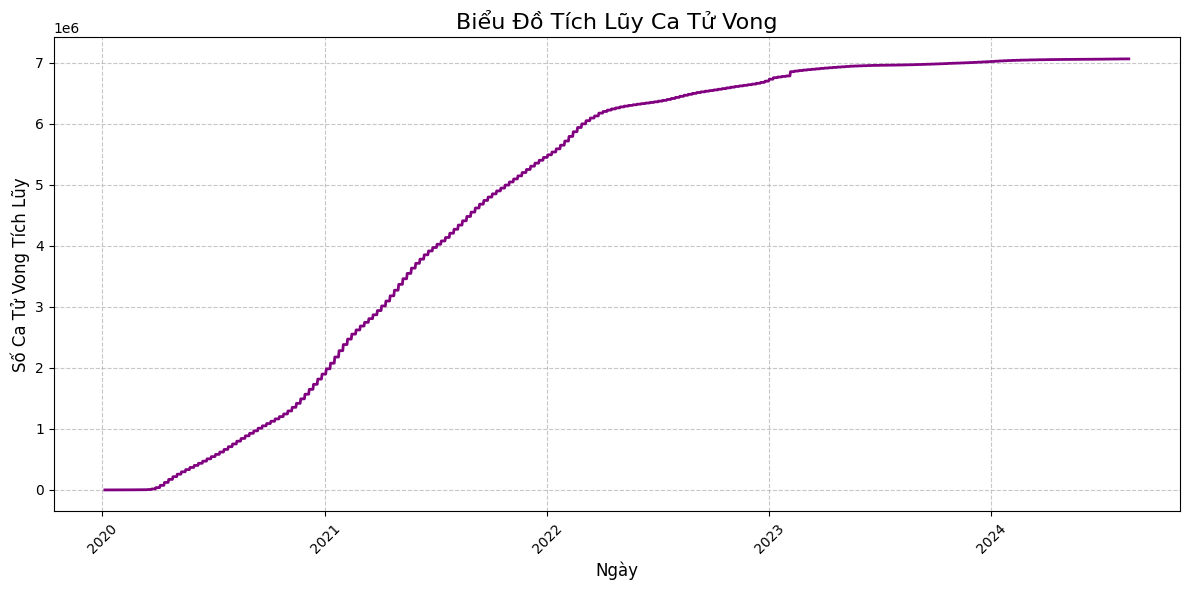

In [30]:
#  Tích lũy ca nhiễm 
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='CumulativeCases', data=cases_over_time, color='green', linewidth=2) 
plt.title('Biểu Đồ Tích Lũy Ca Nhiễm', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Nhiễm Tích Lũy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

#  Tích lũy ca tử vong 
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='CumulativeDeaths', data=deaths_over_time, color='purple', linewidth=2) 
plt.title('Biểu Đồ Tích Lũy Ca Tử Vong', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số Ca Tử Vong Tích Lũy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

## bản đồ heatmap nhiệt thế giới


### số ca nhiễm trên toàn cầu

In [31]:

# bản đồ số ca nhiễm trên toàn cầu 
# Tính tổng số ca nhiễm tối đa cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới
df_cases = country_data.groupby('iso_code')['total_cases'].max().reset_index()
df_merged = df_cases.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_cases', 
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='World COVID-19 Heatmap (Max Total Cases per Country)',
                    projection='natural earth')  


fig.show()


### số ca tử vong toàn cầu

In [32]:

# bản đồ số ca tử vong trên toàn cầu 
# Tính tổng số ca tử vong tối đa cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới

df_deaths = country_data.groupby('iso_code')['total_deaths'].max().reset_index()
df_merged = df_deaths.merge(df_territory, left_on='iso_code', right_on='ISO3166-1-Alpha-3', how='left')
fig = px.choropleth(df_merged,
                    locations='iso_code',
                    color='total_deaths',
                    hover_name='official_name_en',
                    color_continuous_scale='Reds',
                    title='World COVID-19 Heatmap (Max Total Deaths per Country)',
                    projection='natural earth') 

fig.show()


### hỗ trợ của chính phủ


In [33]:

# bản đồ số hỗ trợ của chính phủ  trên toàn cầu 
# Tính max số hỗ trợ của chính phủ cho mỗi quốc gia và kết hợp dữ liệu với bản đò thế giới

df_support=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\sp.csv')

gov_support = df_support.groupby('Code')['e1_income_support'].max().reset_index()
df_merged = gov_support.merge(df_territory, left_on='Code', right_on='ISO3166-1-Alpha-3', how='left')

fig = px.choropleth(df_merged,
                    locations='Code',
                    color='e1_income_support',  
                    hover_name='official_name_en',
                    color_continuous_scale='Blues', 
                    title='World Income Support Heatmap',
                    projection='natural earth')  

fig.update_layout(coloraxis_colorbar=dict(
    title="Income Support",
    tickvals=[0, 1, 2],  
    ticktext=["0: No support", "1: Up to 50% lost income", "2: More than 50% lost income"]
))
fig.show()


### biến chủng omicron và detal

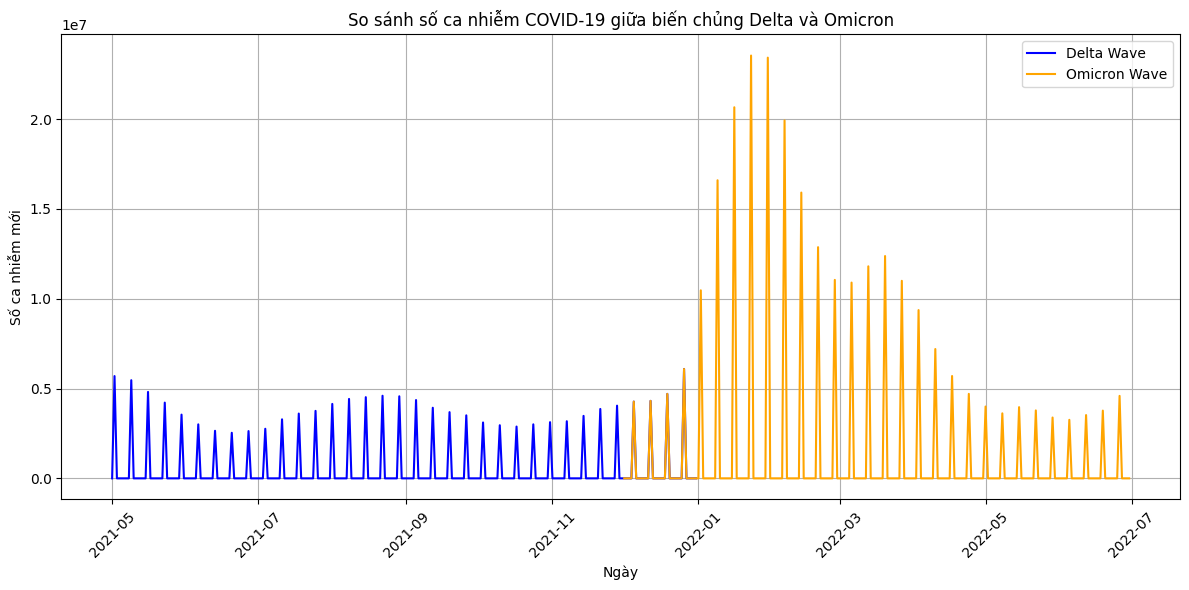

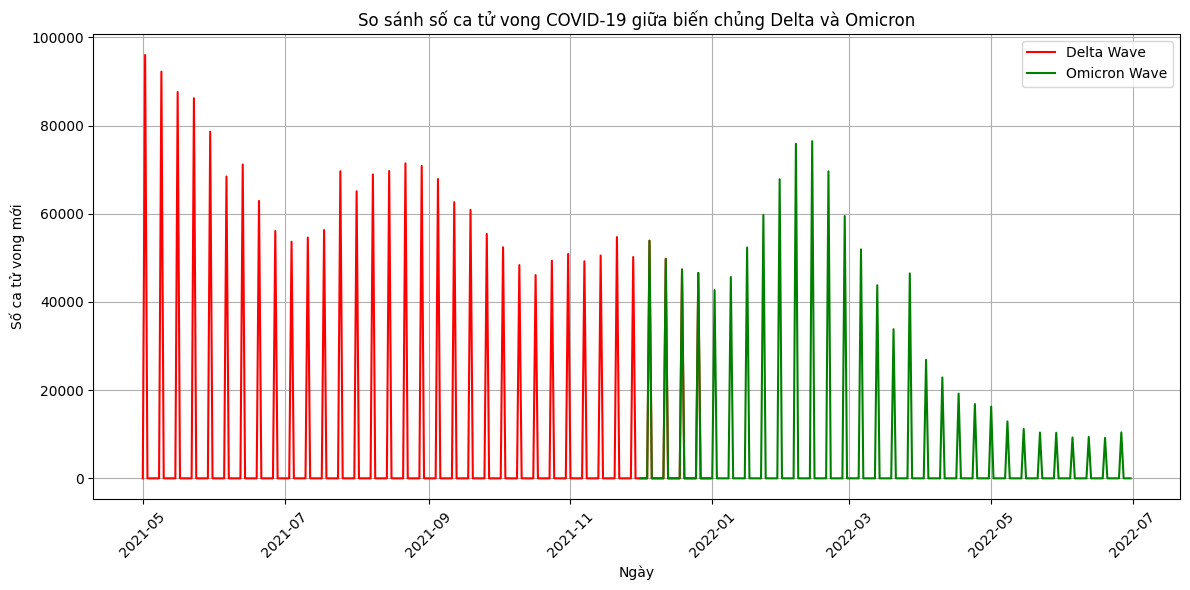

In [34]:
# so sánh biến chủng omicron và delta theo số ca tử vong và nhiễm
# Lọc dữ liệu cho biến chủng Delta (từ tháng 5/2021 đến tháng 12/2021)
delta_wave = World_data[(World_data['date'] >= '2021-05-01') & (World_data['date'] <= '2021-12-31')]
# Lọc dữ liệu cho biến chủng Omicron (từ tháng 12/2021 đến giữa năm 2022)
omicron_wave = World_data[(World_data['date'] >= '2021-12-01') & (World_data['date'] <= '2022-06-30')]

# So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron 
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_cases'], label='Delta Wave', color='blue')
plt.plot(omicron_wave['date'], omicron_wave['new_cases'], label='Omicron Wave', color='orange')
plt.title('So sánh số ca nhiễm COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron 
plt.figure(figsize=(12, 6))
plt.plot(delta_wave['date'], delta_wave['new_deaths'], label='Delta Wave', color='red')
plt.plot(omicron_wave['date'], omicron_wave['new_deaths'], label='Omicron Wave', color='green')
plt.title('So sánh số ca tử vong COVID-19 giữa biến chủng Delta và Omicron')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## châu lục và quốc gia


### biểu đồ tròn tỉ lệ nhiễm và tử vong của các châu lục

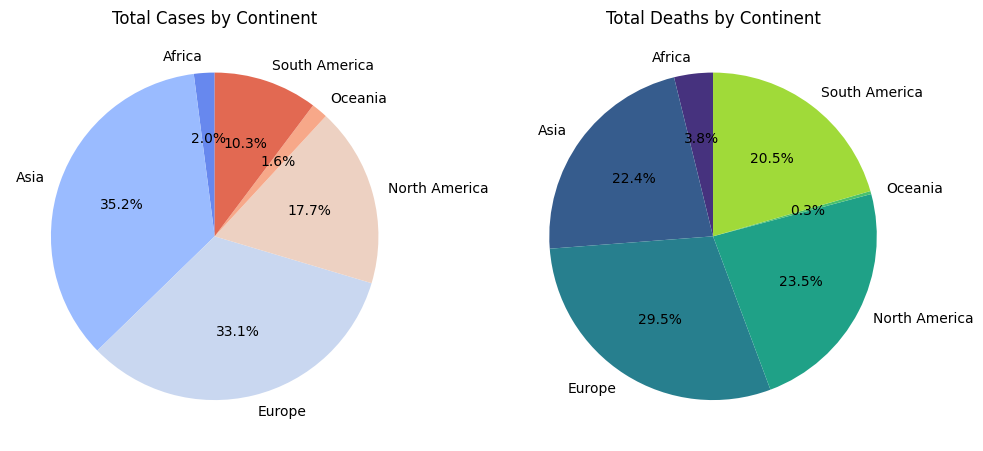

In [35]:
# biểu đồ tròn tỉ lệ nhiễm và tử vong của các châu lục
df_grouped = country_data.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))

# Biểu đồ Tròn cho số ca nhiễm
plt.subplot(1, 2, 1)
plt.pie(df_grouped['total_cases'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(df_grouped)))
plt.title('Total Cases by Continent')

# Biểu đồ Tròn cho số ca tử vong
plt.subplot(1, 2, 2)
plt.pie(df_grouped['total_deaths'], labels=df_grouped['continent'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df_grouped)))
plt.title('Total Deaths by Continent')
plt.tight_layout()
plt.show()




### các nước dẫn đầu về số ca nhiễm và tử vong

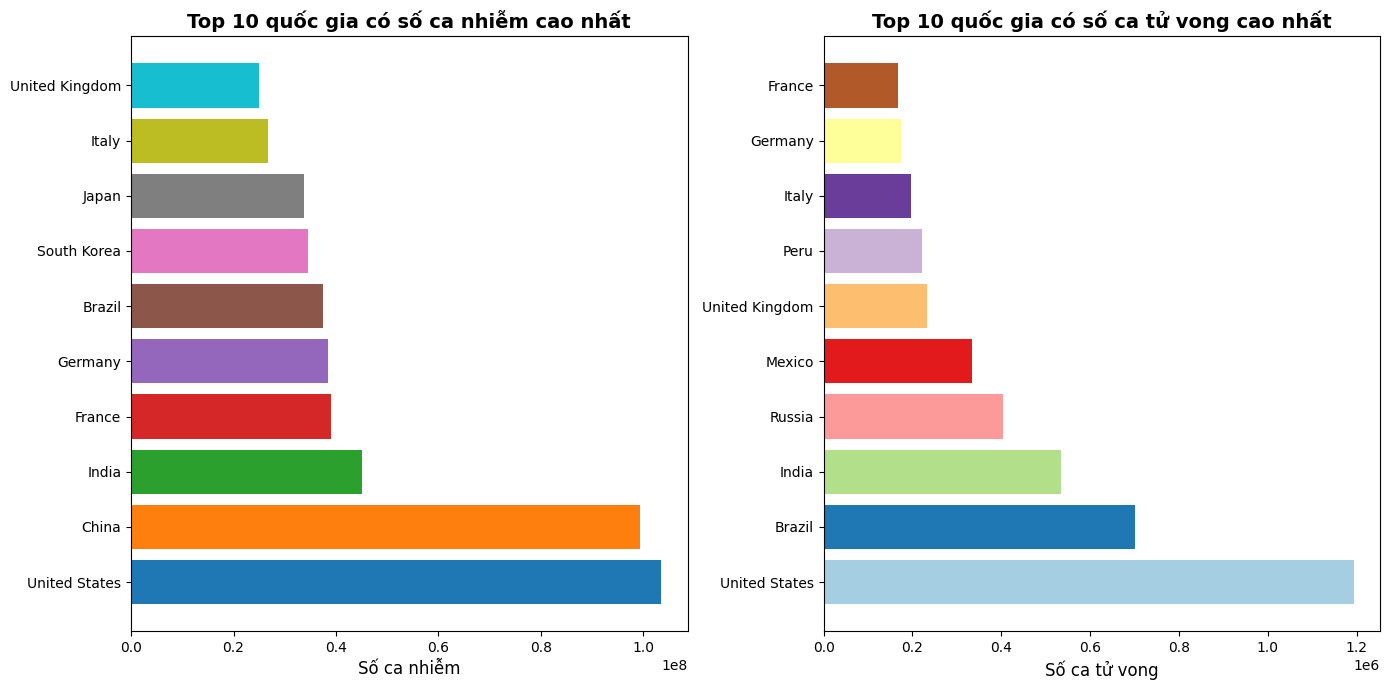

In [36]:
# các nước dẫn đầu về số ca nhiễm và tử vong

top_countries_cases = country_data.groupby('location')['total_cases'].max().nlargest(10)
top_countries_deaths = country_data.groupby('location')['total_deaths'].max().nlargest(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
case_colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries_cases))) 
death_colors = plt.cm.Paired(np.linspace(0, 1, len(top_countries_deaths)))  

ax[0].barh(top_countries_cases.index, top_countries_cases.values, color=case_colors)
ax[0].set_title('Top 10 quốc gia có số ca nhiễm cao nhất', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Số ca nhiễm', fontsize=12)
ax[0].tick_params(axis='both', labelsize=10)

ax[1].barh(top_countries_deaths.index, top_countries_deaths.values, color=death_colors)
ax[1].set_title('Top 10 quốc gia có số ca tử vong cao nhất', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Số ca tử vong', fontsize=12)
ax[1].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


### biều đồ số ca nhiễm tử vong tiêm chủng của các châu lục

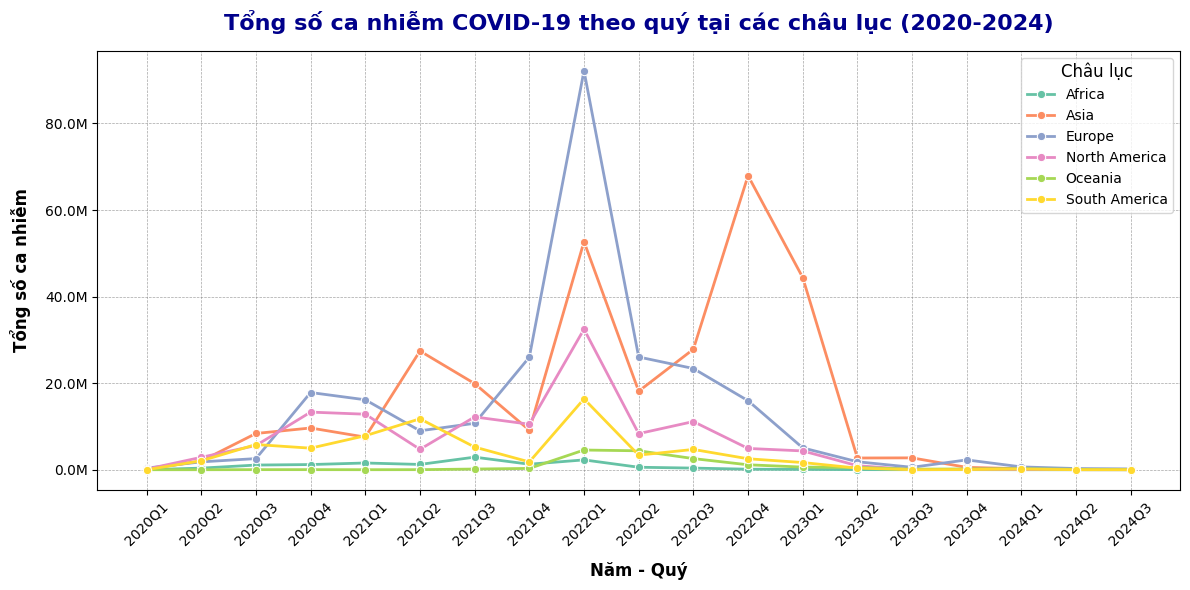

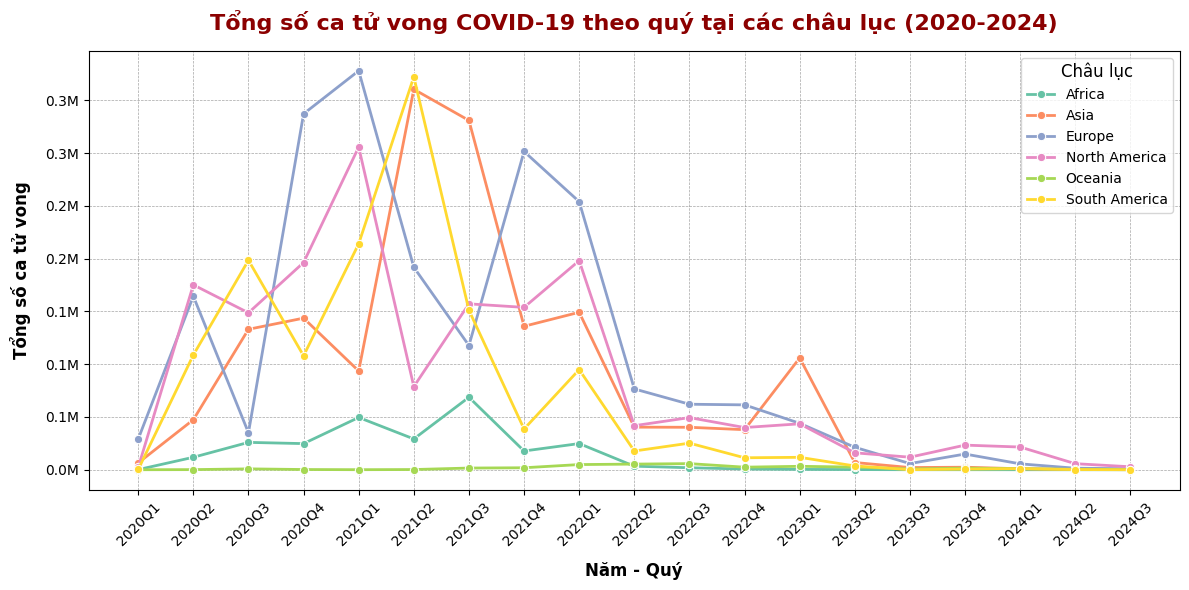

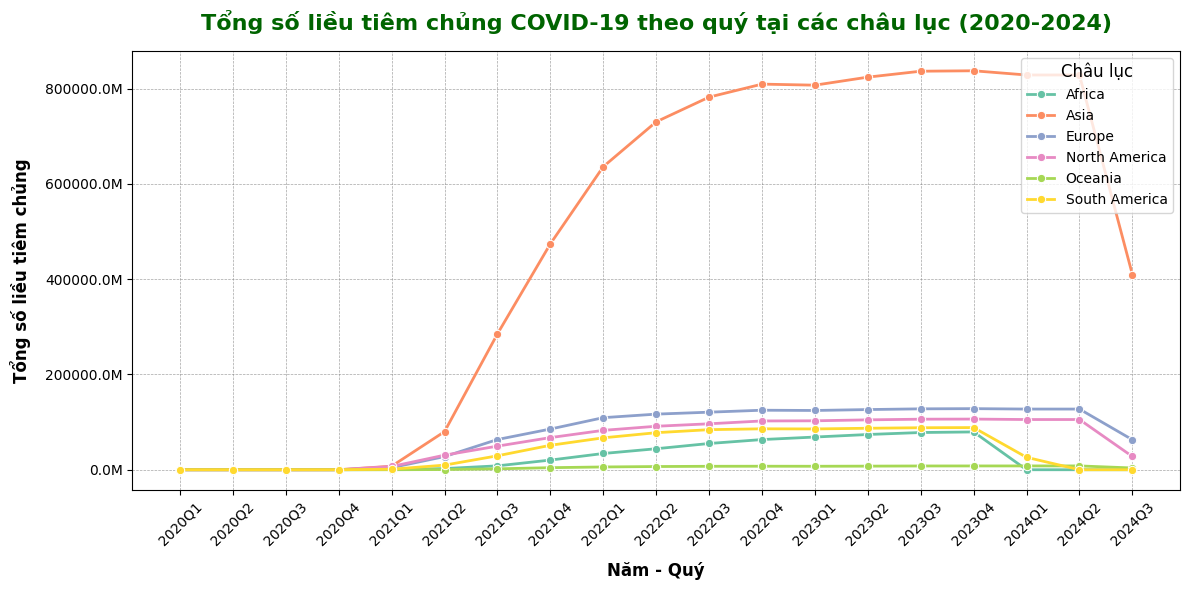

In [37]:

continent_data['date'] = pd.to_datetime(continent_data['date'])
continent_data['year_quarter'] = continent_data['date'].dt.to_period('Q')  # Tạo cột năm và quý
for col in ['new_cases', 'new_deaths', 'total_vaccinations']:
    continent_data[col] = continent_data[col].fillna(0)  

metrics = ['new_cases', 'new_deaths', 'total_vaccinations']
quarterly_data = {}
for metric in metrics:
    quarterly_data[metric] = (
        continent_data.groupby(['location', 'year_quarter'])[metric]
        .sum()
        .reset_index()
        .assign(year_quarter=lambda df: df['year_quarter'].astype(str))  
    )

def plot_metric(data, metric, title, ylabel, color):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=data, 
        x='year_quarter', 
        y=metric, 
        hue='location', 
        palette='Set2', 
        marker='o', 
        markersize=6, 
        linewidth=2,
    )
    plt.title(title, fontsize=16, fontweight="bold", color=color, pad=15)
    plt.xlabel("Năm - Quý", fontsize=12, labelpad=10, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, labelpad=10, fontweight="bold")
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')) 
    plt.tight_layout()
    plt.legend(title="Châu lục", loc="upper right", fontsize=10, title_fontsize=12, frameon=True)
    plt.show()
plot_metric(
    quarterly_data['new_cases'], 
    'new_cases', 
    "Tổng số ca nhiễm COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số ca nhiễm", 
    "darkblue"
)

plot_metric(
    quarterly_data['new_deaths'], 
    'new_deaths', 
    "Tổng số ca tử vong COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số ca tử vong", 
    "darkred"
)

plot_metric(
    quarterly_data['total_vaccinations'], 
    'total_vaccinations', 
    "Tổng số liều tiêm chủng COVID-19 theo quý tại các châu lục (2020-2024)", 
    "Tổng số liều tiêm chủng", 
    "darkgreen"
)


### vaccine

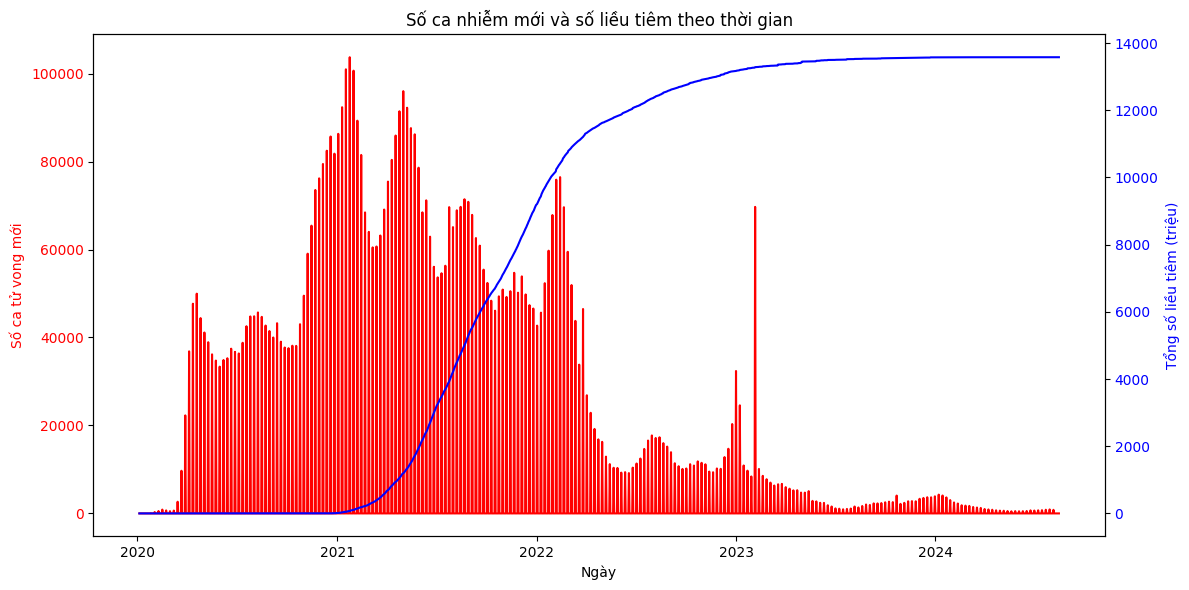

In [38]:
# Xu hướng số ca nhiễm và số triệu liều tiêm theo thời gian
time_vaccine_cases = World_data.groupby('date').sum()

# Vẽ biểu đồ với hai trục Y
fig, ax1 = plt.subplots(figsize=(12, 6))
# Trục Y thứ nhất - Số ca nhiễm
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Số ca tử vong mới', color='red')
ax1.plot(time_vaccine_cases.index, time_vaccine_cases['new_deaths'], label='Số ca tử vong mới ', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Trục Y thứ hai - Số liều tiêm
ax2 = ax1.twinx()
ax2.set_ylabel('Tổng số liều tiêm (triệu)', color='blue')
ax2.plot(time_vaccine_cases.index, time_vaccine_cases['total_vaccinations'] / 1e6, label='Tổng số liều tiêm (triệu)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Số ca nhiễm mới và số liều tiêm theo thời gian')
fig.tight_layout()
plt.show()


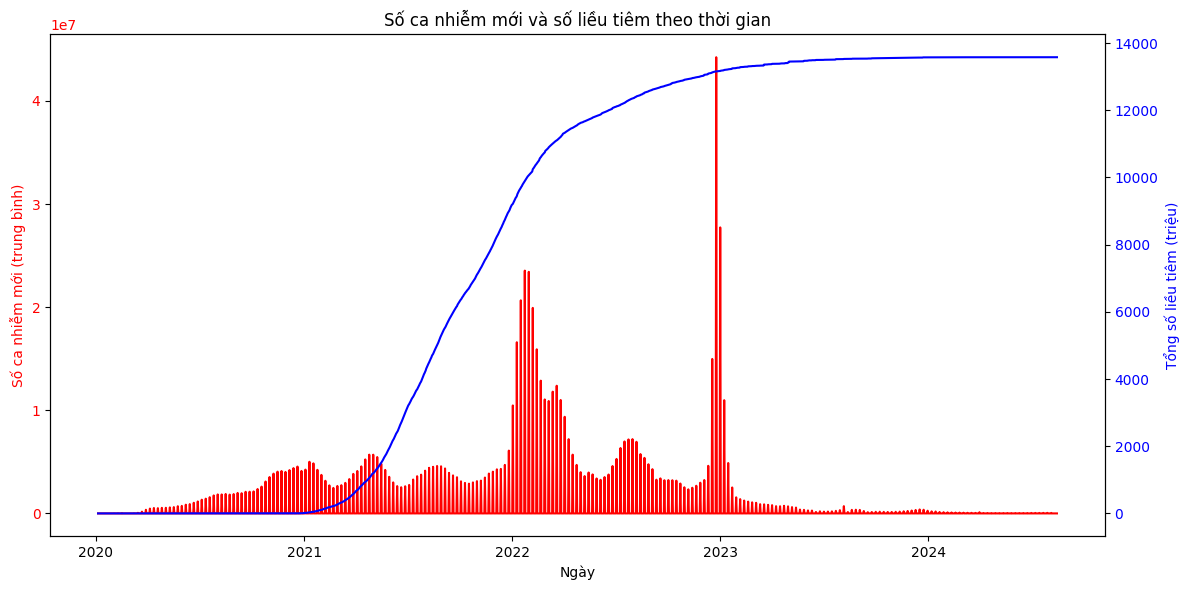

In [39]:
# Xu hướng số ca nhiễm và số triệu liều tiêm theo thời gian
time_vaccine_cases = World_data.groupby('date').sum()
# Vẽ biểu đồ với hai trục Y
fig, ax1 = plt.subplots(figsize=(12, 6))
# Trục Y thứ nhất - Số ca nhiễm
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Số ca nhiễm mới (trung bình)', color='red')
ax1.plot(time_vaccine_cases.index, time_vaccine_cases['new_cases'], label='Số ca nhiễm mới (trung bình)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Trục Y thứ hai - Số liều tiêm
ax2 = ax1.twinx()
ax2.set_ylabel('Tổng số liều tiêm (triệu)', color='blue')
ax2.plot(time_vaccine_cases.index, time_vaccine_cases['total_vaccinations'] / 1e6, label='Tổng số liều tiêm (triệu)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Số ca nhiễm mới và số liều tiêm theo thời gian')
fig.tight_layout()
plt.show()


### dự đoán số ca nhiễm tử vong trong tương lai bằng hồi quy tuyến tính

a:\VScode\Python\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

a:\VScode\Python\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



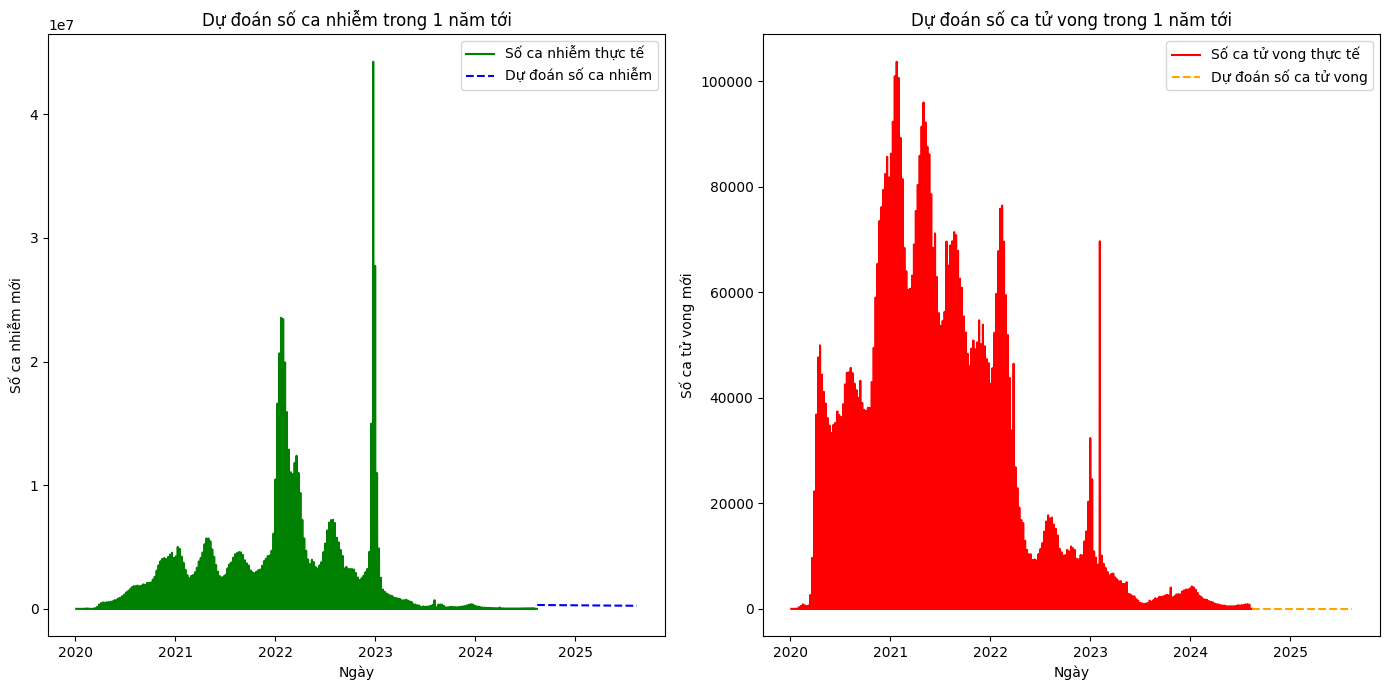

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



# Chuyển đổi cột 'date' thành kiểu dữ liệu datetime
World_data['date'] = pd.to_datetime(World_data['date'])

# Tính số ngày kể từ ngày đầu tiên trong dữ liệu
World_data['days_since_start'] = (World_data['date'] - World_data['date'].min()).dt.days

# Tạo mô hình hồi quy tuyến tính cho số ca nhiễm
X = World_data[['days_since_start']]  # Biến độc lập (số ngày)
y_cases = World_data['new_cases']  # Biến phụ (số ca nhiễm)

regressor_cases = LinearRegression()
regressor_cases.fit(X, y_cases)

# Dự đoán số ca nhiễm trong tương lai (365 ngày tới)
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 366).reshape(-1, 1)
future_cases = regressor_cases.predict(future_days)

# Đảm bảo rằng số ca nhiễm không thể âm
future_cases = np.maximum(future_cases, 0)

# Tạo mô hình hồi quy tuyến tính cho số ca tử vong
y_deaths = World_data['new_deaths']  # Biến phụ (số ca tử vong)

regressor_deaths = LinearRegression()
regressor_deaths.fit(X, y_deaths)

# Dự đoán số ca tử vong trong tương lai (365 ngày tới)
future_deaths = regressor_deaths.predict(future_days)

# Đảm bảo rằng số ca tử vong không thể âm
future_deaths = np.maximum(future_deaths, 0)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Biểu đồ dự đoán số ca nhiễm
plt.subplot(1, 2, 1)
plt.plot(World_data['date'], World_data['new_cases'], label='Số ca nhiễm thực tế', color='green')
plt.plot(pd.to_datetime(World_data['date'].min()) + pd.to_timedelta(future_days.flatten(), unit='D'), future_cases, label='Dự đoán số ca nhiễm', color='blue', linestyle='--')
plt.title('Dự đoán số ca nhiễm trong 1 năm tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.legend()

# Biểu đồ dự đoán số ca tử vong
plt.subplot(1, 2, 2)
plt.plot(World_data['date'], World_data['new_deaths'], label='Số ca tử vong thực tế', color='red')
plt.plot(pd.to_datetime(World_data['date'].min()) + pd.to_timedelta(future_days.flatten(), unit='D'), future_deaths, label='Dự đoán số ca tử vong', color='orange', linestyle='--')
plt.title('Dự đoán số ca tử vong trong 1 năm tới')
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong mới')
plt.legend()

plt.tight_layout()
plt.show()


## ảnh hưởng của covid 19 lên các lĩnh vực khác

### kinh tế các quốc gia phát triển trong quý 2 2020

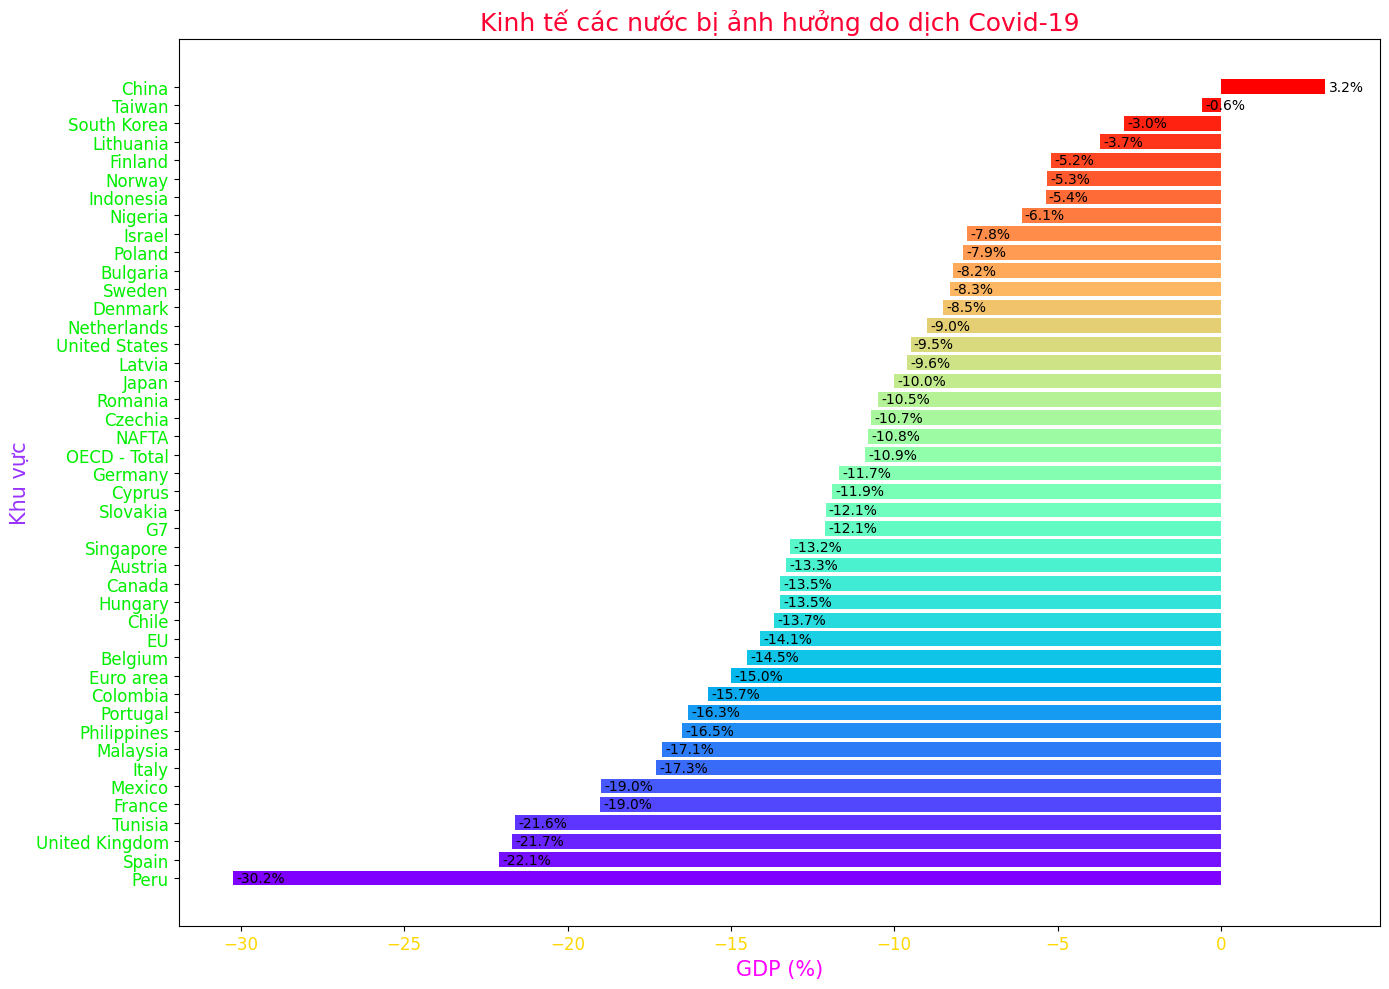

In [41]:
# kinh tế các quốc gia phát triển trong quý 2 2020
from matplotlib.cm import rainbow
gdp1=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\gdp1.csv')
data_economic = gdp1[["Entity","GDP growth from previous year, 2020 Q2"]]
data_economic = data_economic.sort_values(by="GDP growth from previous year, 2020 Q2",ascending=True)
colors = rainbow(np.linspace(0, 1, len(data_economic)))

plt.figure(figsize=(14, 10), dpi=100, facecolor='white') 

bars = plt.barh(data_economic["Entity"], data_economic["GDP growth from previous year, 2020 Q2"], color=colors)
plt.xlabel("GDP (%)", fontsize=15, color="#FF00FF")
plt.ylabel("Khu vực", fontsize=15, color="#9933FF")
plt.tick_params(axis="y", labelcolor="#00EE00",labelsize=12)
plt.tick_params(axis="x", labelcolor="#FFD700", labelsize=12)
plt.title(
    "Kinh tế các nước bị ảnh hưởng do dịch Covid-19",
    fontsize=18,
    color="#FF0033",
)
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.1f}%",
        va="center",
        ha="left",
        fontsize=10,
    )
plt.tight_layout()
plt.show()

### ảnh hưởng đến ngành giao thông du lịch dịch vụ

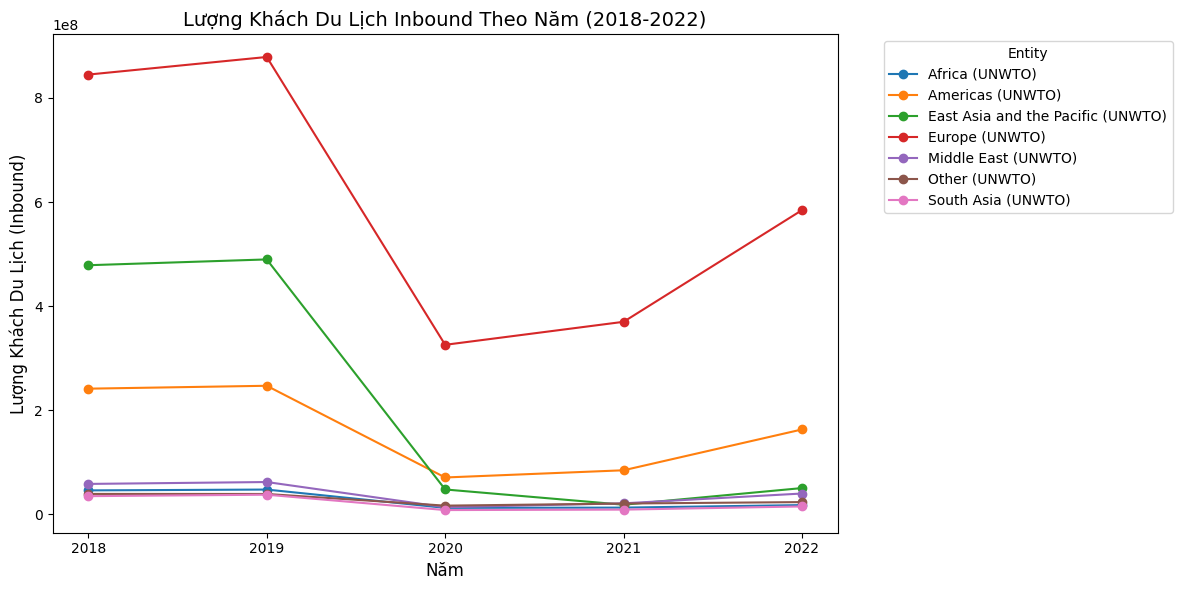

In [42]:
# ảnh hưởng đến ngành giao thông du lịch dịch vụ

travel=pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\travel.csv')
df_filtered =travel[(travel['Year'] >= 2018) & (travel['Year'] <= 2022)]

plt.figure(figsize=(12, 6))
for entity in df_filtered['Entity'].unique():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['inbound_tourism_by_region'], marker='o', label=entity)
plt.title('Lượng Khách Du Lịch Inbound Theo Năm (2018-2022)', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Lượng Khách Du Lịch (Inbound)', fontsize=12)
plt.xticks(df_filtered['Year'].unique())
plt.legend(title="Entity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### ảnh hưởng đến tỉ lệ thất nghiệp gdp việc làm

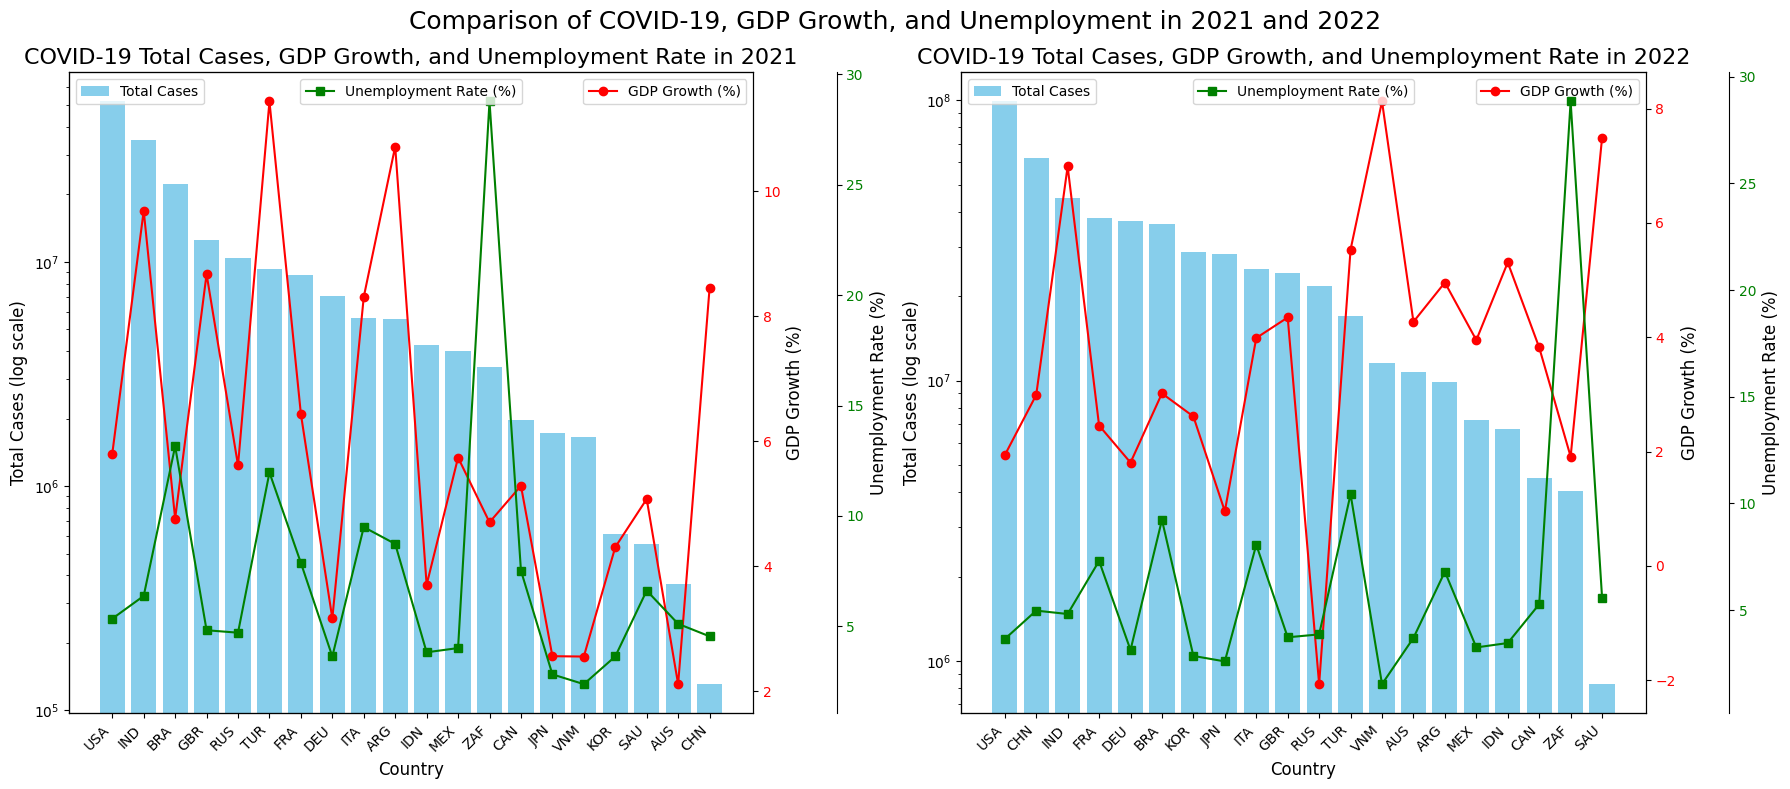

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = country_data
gdp_data = pd.read_csv(r'A:\UET-VNU\Covid19_KNK\Datacovid19\worldbank_data_g20_vietnam_2021_2022.csv')
mapping = {
    'AR': 'ARG', 'AU': 'AUS', 'BR': 'BRA', 'CA': 'CAN', 'CN': 'CHN', 'DE': 'DEU',
    'EU': 'EU', 'FR': 'FRA', 'GB': 'GBR', 'ID': 'IDN', 'IN': 'IND', 'IT': 'ITA',
    'JP': 'JPN', 'KR': 'KOR', 'MX': 'MEX', 'RU': 'RUS', 'SA': 'SAU', 'TR': 'TUR',
    'US': 'USA', 'VN': 'VNM', 'ZA': 'ZAF'
}
gdp_data['iso_code'] = gdp_data['Country'].map(mapping)

def prepare_data(year):
    gdp_unemployment = gdp_data[gdp_data['Year'] == year][['iso_code', 'GDP Growth (%)', 'Unemployment Rate (%)']]
    covid_year = covid_data[covid_data['date'] <= f'{year}-12-31']
    total_cases = covid_year.groupby('iso_code')['total_cases'].max().reset_index().rename(columns={'total_cases': 'Total Cases'})
    merged_data = total_cases.merge(gdp_unemployment, on='iso_code', how='inner').sort_values(by='Total Cases', ascending=False)
    return merged_data

merged_data_2021 = prepare_data(2021)
merged_data_2022 = prepare_data(2022)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

def plot_data(ax, data, title):
    ax.bar(data['iso_code'], data['Total Cases'], color='skyblue', label='Total Cases')
    ax.set_xlabel('Country', fontsize=12)
    ax.set_ylabel('Total Cases (log scale)', fontsize=12)
    ax.set_yscale('log')
    ax.set_xticks(np.arange(len(data['iso_code'])))
    ax.set_xticklabels(data['iso_code'], rotation=45, ha='right', fontsize=10)
    ax.set_title(title, fontsize=16)

    # Biểu đồ đường (GDP Growth)
    ax2 = ax.twinx()
    ax2.plot(data['iso_code'], data['GDP Growth (%)'], color='red', marker='o', label='GDP Growth (%)')
    ax2.set_ylabel('GDP Growth (%)', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    # Biểu đồ đường (Unemployment Rate)
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(data['iso_code'], data['Unemployment Rate (%)'], color='green', marker='s', label='Unemployment Rate (%)')
    ax3.set_ylabel('Unemployment Rate (%)', fontsize=12)
    ax3.tick_params(axis='y', labelcolor='green')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper center')
plot_data(ax1, merged_data_2021, 'COVID-19 Total Cases, GDP Growth, and Unemployment Rate in 2021')
plot_data(ax2, merged_data_2022, 'COVID-19 Total Cases, GDP Growth, and Unemployment Rate in 2022')
fig.suptitle('Comparison of COVID-19, GDP Growth, and Unemployment in 2021 and 2022', fontsize=18)
plt.tight_layout()
plt.show()


## viet nam

In [44]:
vietnam_data=country_data[country_data['location']=='Vietnam']

### số ca nhiễm mới qua các giai đoạn

C:\Users\FPT\AppData\Local\Temp\ipykernel_3372\1388812549.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



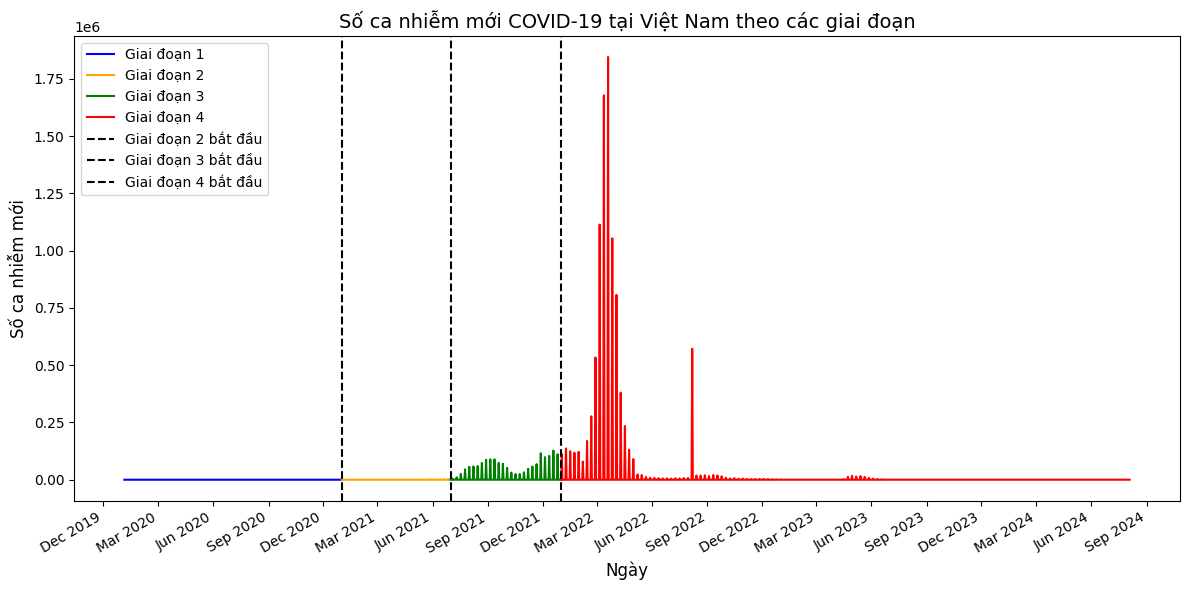

In [45]:
import matplotlib.dates as mdates  # Đảm bảo import mdates


# Chuyển cột 'date' thành kiểu datetime nếu chưa có
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])

# Tạo các giai đoạn
giai_doan_1 = vietnam_data[(vietnam_data['date'] >= '2020-01-01') & (vietnam_data['date'] <= '2020-12-31')]
giai_doan_2 = vietnam_data[(vietnam_data['date'] >= '2021-01-01') & (vietnam_data['date'] <= '2021-06-30')]
giai_doan_3 = vietnam_data[(vietnam_data['date'] >= '2021-07-01') & (vietnam_data['date'] <= '2021-12-31')]
giai_doan_4 = vietnam_data[(vietnam_data['date'] >= '2022-01-01')]

# Tạo biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ các đường cho từng giai đoạn
plt.plot(giai_doan_1['date'], giai_doan_1['new_cases'], label='Giai đoạn 1', color='blue')
plt.plot(giai_doan_2['date'], giai_doan_2['new_cases'], label='Giai đoạn 2', color='orange')
plt.plot(giai_doan_3['date'], giai_doan_3['new_cases'], label='Giai đoạn 3', color='green')
plt.plot(giai_doan_4['date'], giai_doan_4['new_cases'], label='Giai đoạn 4', color='red')

# Thêm mốc phân chia các giai đoạn bằng các đường dọc
plt.axvline(x=pd.to_datetime('2021-01-01'), color='black', linestyle='--', label='Giai đoạn 2 bắt đầu')
plt.axvline(x=pd.to_datetime('2021-07-01'), color='black', linestyle='--', label='Giai đoạn 3 bắt đầu')
plt.axvline(x=pd.to_datetime('2022-01-01'), color='black', linestyle='--', label='Giai đoạn 4 bắt đầu')

# Định dạng trục x (ngày tháng)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Đặt khoảng cách giữa các mốc thời gian là 3 tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Định dạng ngày tháng
plt.gcf().autofmt_xdate()  # Xoay chữ cho dễ đọc

# Thêm các nhãn và tiêu đề
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số ca nhiễm mới', fontsize=12)
plt.title('Số ca nhiễm mới COVID-19 tại Việt Nam theo các giai đoạn', fontsize=14)

# Thêm chú thích và hiển thị
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


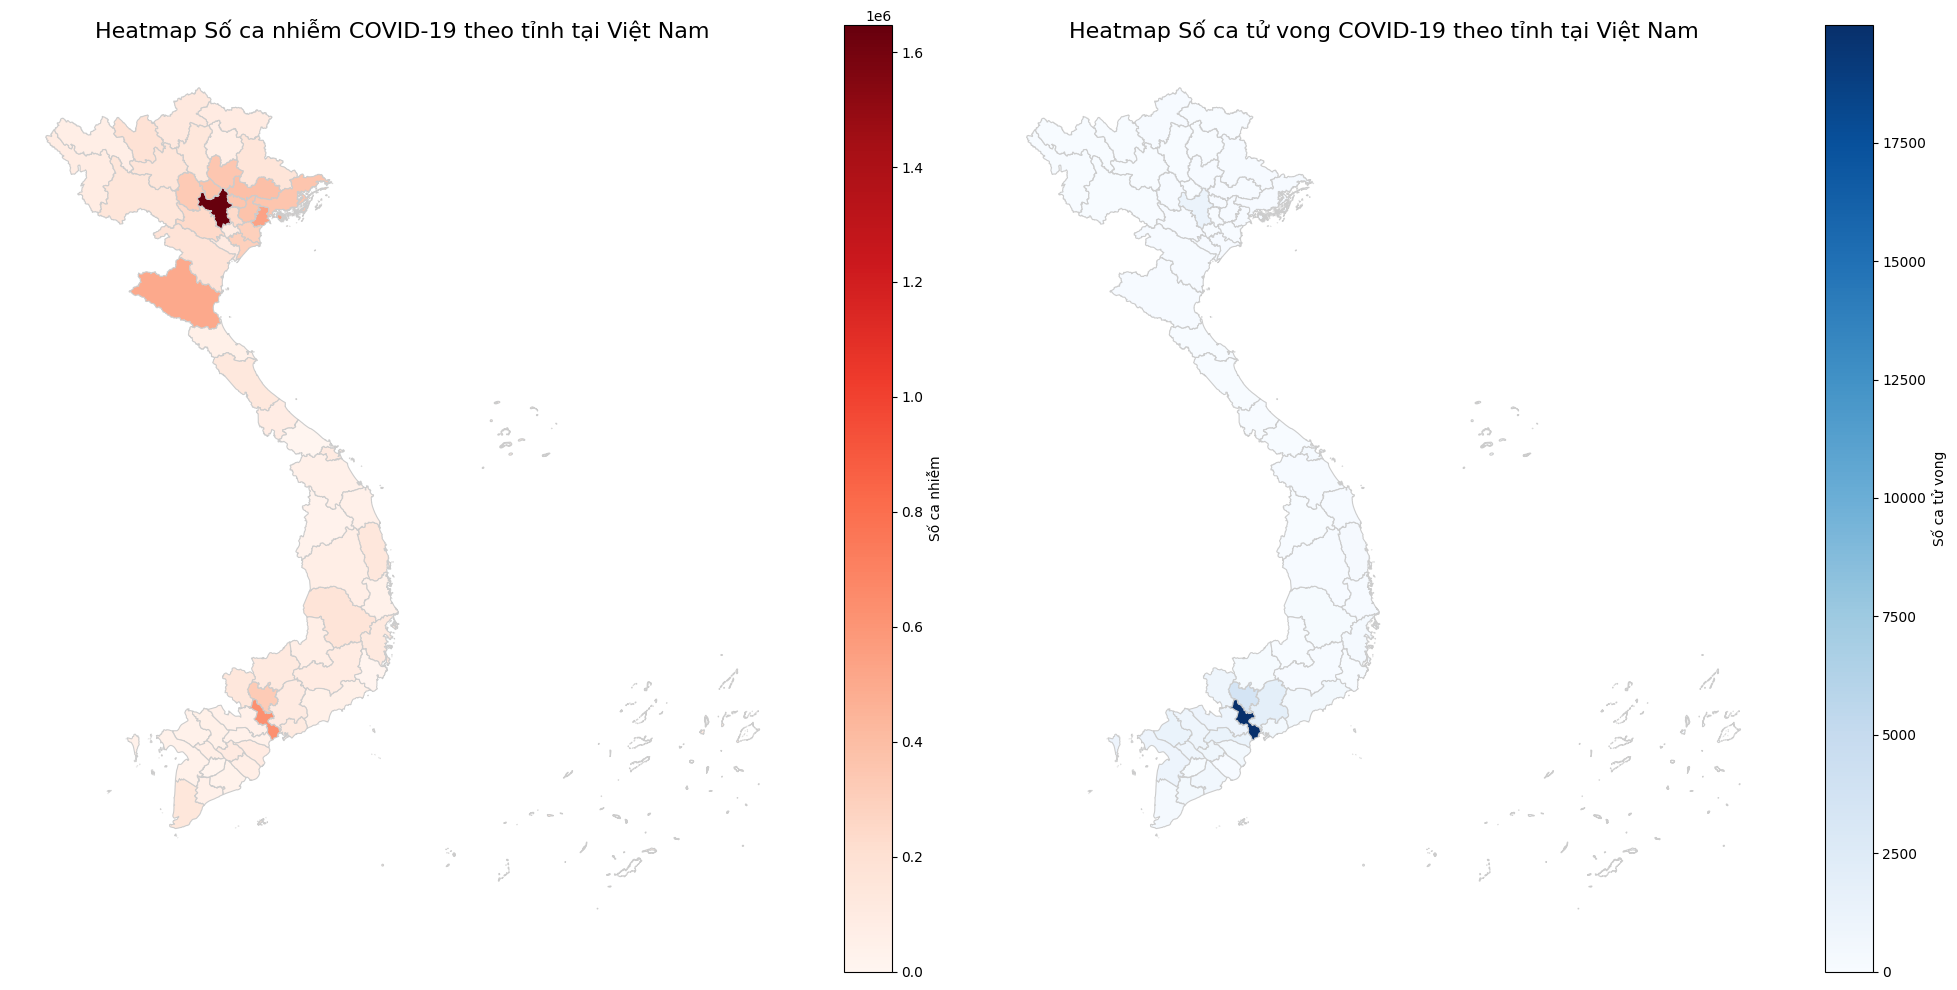

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import unidecode  # Xử lý dấu tiếng Việt

# Dữ liệu COVID-19 đầy đủ
covid_data = pd.DataFrame({
    'Province': ['ha noi', 'tp. ho chi minh', 'hai phong', 'nghe an', 'bac giang', 'vinh phuc',
                 'hai duong', 'quang ninh', 'bac ninh', 'thai nguyen', 'phu tho', 'binh duong',
                 'nam dinh', 'thai binh', 'hung yen', 'hoa binh', 'lao cai', 'thanh hoa',
                 'dak lak', 'lang son', 'yen bai', 'son la', 'ca mau', 'tuyen quang', 'tay ninh',
                 'binh dinh', 'quang binh', 'ha giang', 'khanh hoa', 'binh phuoc', 'ba ria - vung tau',
                 'da nang', 'dong nai', 'ninh binh', 'vinh long', 'ben tre', 'cao bang', 'lam dong',
                 'ha nam', 'dien bien', 'quang tri', 'bac kan', 'can tho', 'lai chau', 'tra vinh',
                 'dak nong', 'gia lai', 'ha tinh', 'binh thuan', 'dong thap', 'quang ngai',
                 'long an', 'quang nam', 'thua thien hue', 'bac lieu', 'phu yen', 'kien giang',
                 'an giang', 'tien giang', 'soc trang', 'kon tum', 'hau giang', 'ninh thuan'],
    'Cases': [1646923, 629018, 537527, 502049, 391440, 375686, 372391, 356404, 353869,
              347519, 331520, 325667, 301101, 296789, 244028, 239941, 188846, 178595,
              172439, 160752, 158046, 153602, 147734, 147582, 140444, 139890, 129648,
              122610, 122036, 120003, 110822, 108712, 107518, 104800, 103505, 99799,
              99051, 98238, 91467, 90757, 86293, 77048, 76925, 75519, 75174, 73427,
              70961, 55279, 54300, 51614, 50513, 50297, 49556, 48186, 46949, 44481,
              43659, 43297, 39902, 34457, 26342, 17900, 9001],
    'Deaths': [1232, 19985, 138, 145, 92, 19, 117, 150, 136,
               112, 97, 3519, 150, 23, 5, 102, 38, 109, 201, 85,
               13, 0, 357, 14, 944, 281, 74, 80, 364, 224, 497,
               338, 1903, 93, 829, 490, 59, 141, 65, 23, 38, 19,
               958, 0, 115, 47, 116, 50, 482, 1007, 127, 1088, 150,
               173, 470, 137, 1027, 1325, 1290, 634, 1, 231, 60]
})

# Đọc file GeoJSON
vietnam_map = gpd.read_file(r'A:\UET-VNU\Covid19_KNK\Datacovid19\diaphantinhenglish.geojson')

# Chuẩn hóa tên tỉnh thành
vietnam_map['Name'] = vietnam_map['Name'].apply(lambda x: unidecode.unidecode(x).lower())

# Gộp dữ liệu
merged_data = vietnam_map.merge(covid_data, left_on='Name', right_on='Province', how='left')

# Điền giá trị NaN bằng 0
merged_data['Cases'] = merged_data['Cases'].fillna(0)
merged_data['Deaths'] = merged_data['Deaths'].fillna(0)

# Vẽ hai biểu đồ song song
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Bản đồ số ca nhiễm
merged_data.plot(
    column='Cases',
    cmap='Reds',
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Số ca nhiễm"}
)
axes[0].set_title('Heatmap Số ca nhiễm COVID-19 theo tỉnh tại Việt Nam', fontsize=16)
axes[0].axis('off')

# Bản đồ số ca tử vong
merged_data.plot(
    column='Deaths',
    cmap='Blues',
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Số ca tử vong"}
)
axes[1].set_title('Heatmap Số ca tử vong COVID-19 theo tỉnh tại Việt Nam', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [47]:
print(df_cases.head())       # In ra các dòng đầu tiên của df_cases
print(df_territory.head())   # In ra các dòng đầu tiên của df_territory


  iso_code  total_cases
0      ABW      44224.0
1      AFG     235214.0
2      AGO     107481.0
3      AIA       3904.0
4      ALB     335047.0
  FIFA   Dial ISO3166-1-Alpha-3 MARC   is_independent  ISO3166-1-numeric  \
0  AFG     93               AFG   af              Yes                  4   
1  ALD    358               ALA            Part of FI                248   
2  ALB    355               ALB   aa              Yes                  8   
3  ALG    213               DZA   ae              Yes                 12   
4  ASA  1-684               ASM   as  Territory of US                 16   

     GAUL FIPS WMO ISO3166-1-Alpha-2  ...    official_name_ru Global Name  \
0     1.0   AF  AF                AF  ...          Афганистан       World   
1  1242.0                         AX  ...  Аландских островов       World   
2     3.0   AL  AB                AL  ...             Албания       World   
3     4.0   AG  AL                DZ  ...               Алжир       World   
4     5.0   AQ